# Assignment 2 Report - Chloe Lim Jiexi (S10223281K)

# Overview <a id="Overview"></a>
#### 1. [Project Objectives](#ProjectObjective)
   - [List of Questions based on scenario](#Questions)
#### 2. [Data Preparation](#DataPreparation)
   - [Describe the state of the data](#DataState)
   - [Steps on how the data is being prepared](#LoadSteps)
#### 3. [Visualizations](#Visualizations)
#### 4. [DashBoards](#Dashboards)  
   - [4.1 DashBoard for Product](#prodDashboard)
   - [4.2 DashBoard for Price](#priceDashboard)


# 1. Project Objectives <a id="ProjectObjective"></a>

## List of Questions based on scenario <a id="Questions"></a>

### Customer Analysis 
[Customer Visuals](#CustomerVisuals)
1. Which customer generated the most profit? 
    
[Visual 1](#custvisual1)
    
2. Which customer generated the most revenue? 
    
[Visual 2](#custvisual2)

### Product Analysis
[Product Visuals](#ProductVisuals)
1. Which product generated the most revenue? 
    
[Visual 1](#prodvisual1)
    
2. Which product category has the most amount of profit? 
    
[Visual 2](#prodvisual2)
    
3. Which product category sold the highest quantity? 
    
[Visual 3](#prodvisual3)
    
### Price Analysis
[Price Visuals](#PriceVisuals)
    
1. How is the revenue and profit for each month in the year 2017?
    
[Visual 1](#pricevisual1)
    
2. Does the product unit cost/price increase due time date? 
    
[Visual 2](#pricevisual2)

    
### Place Analysis 
[Place Visuals](#PlaceVisuals)
    
1. Which countries/cities generated the most/less revenue/profit? 
    
[Visual 1](#placevisual1)
    
2. How are customers distributed across locations? 
    
[Visual 2](#placevisual2)

# 2. Data Preparation <a id="DataPreparation"></a>

## Describe the state of the data <a id="DataState"></a>
From the data csv file given, I wasnt expect to do substantial data cleanup as it was quite clean and complete
through the code df.info().

However, there were some factors such as Revenue and Profit that needed calculation, along with factors
such as Product Category or Customer Name that I needed to use groupby for. 

## Steps on how the data is being prepared <a id="LoadSteps"></a> 
Firstly, I loaded the data into a dataframe by reading it from its csv file, by using the code:
    
filename = 'Dart Sales Transactional Data.csv' 

df = pd.read_csv(filename)

Next, I view the first 5 rows of the dataframe by using df.head() to 
ensure that the data is loaded into this notebook properly in order carry on. 

Afterwards, I used the code df.describe() to understand the data better and
in order to  make sure that there are no missing values in dataframe, i used the code df.info().

Along the way, I also filtered data rows by years (e.g.) to get data in a specific year and created 
numpy arrays for relevant columns in df for subsequent plotting purposes.

Lastly, I did some calculations to get revenue and profit respectively.
Calculation method for :
    
Factor | Method
---|---
Revenue | UnitPirce in USD * Order Quantity
Profit | UnitPrice in USD - UnitCost in USD

In [1]:
# "plt" is a widely accepted alias for the "matplotlib.pyplot" library
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import figure

# The inline magic function enables your plots to appear inline in this Jupyter Notebook 
%matplotlib inline

# Import NumPy and Pandas libraries
import numpy as np
import pandas as pd

In [2]:
## Load Data

In [3]:
# Load car loans financing data into a pandas dataframe from a csv file
filename = 'Dart Sales Transactional Data.csv'  # relative filepaths
df = pd.read_csv(filename)

In [4]:
df.describe()

,OrderID,Order Year,Order Day,Quantity,UnitPrice in USD,Unit Discount in %,UnitCost in USD,Freight Cost (Paid by Customer)
count,2172.000000,2172.000000,2172.00000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000
mean,10662.680479,2016.737109,15.29512,23.918969,32.378715,0.055953,26.499075,1083.886367
std,243.294300,0.938184,8.67574,19.167781,54.376570,0.083202,42.485014,734.904217
min,10248.000000,2014.000000,1.00000,1.000000,0.990000,0.000000,0.890000,12.450000
25%,10452.000000,2016.000000,8.00000,10.000000,9.247500,0.000000,7.400000,406.900000
50%,10659.500000,2017.000000,15.00000,20.000000,19.775000,0.000000,16.170000,896.150000
75%,10868.250000,2017.000000,23.00000,30.000000,31.975000,0.100000,26.490000,1774.840000
max,11083.000000,2018.000000,31.00000,150.000000,432.530000,0.250000,304.700000,2544.250000


In [5]:
df.info

<bound method DataFrame.info of       OrderID  Order Year Order Quarter Order Month  Order Day  \
0       10248        2018         Qtr 1     January         30   
1       10248        2018         Qtr 1     January         30   
2       10248        2018         Qtr 1     January         30   
3       10249        2017         Qtr 1     January         29   
4       10249        2017         Qtr 1     January         29   
...       ...         ...           ...         ...        ...   
2167    11083        2017         Qtr 2        June         16   
2168    11083        2017         Qtr 2        June         16   
2169    11083        2017         Qtr 2        June         16   
2170    11083        2017         Qtr 2        June         16   
2171    11083        2017         Qtr 2        June         16   

         Customer Name Customer Country Customer City          ProductName  \
0     Dr Jims Trousers               UK        London      Desperado Jeans   
1     Dr Jims Trous

In [6]:
# Create numpy arrays for relevant columns in df for subsequent plotting purposes
month_number = df.loc[0:9, 'Order Month'].values  # first ten row, and month col
quantity = df.loc[0:9, 'Quantity'].values
#unit_price = df.loc[0:9, 'UnitPrice in USD'].values
#unit_cost = df.loc[0:9, 'UnitCost in USD'].values
custName = df.loc[0:9, 'Customer Name'].values
customer_city = df.loc[0:9, 'Customer City'].values
customer_country = df.loc[0:9, 'Customer Country'].values
freight_cost = df.loc[0:9, 'Freight Cost (Paid by Customer)'].values
product_name = df.loc[0:9, 'ProductName'].values

# 3. Visualizations <a id="Visualizations"></a>

## Visuals for Customer Analysis <a id="CustomerVisuals"></a>
[Link to Overview](#Overview)

### Visual 1 <a id="custvisual1"></a>
This visual helps to answer the question which customer generated the most profit? 

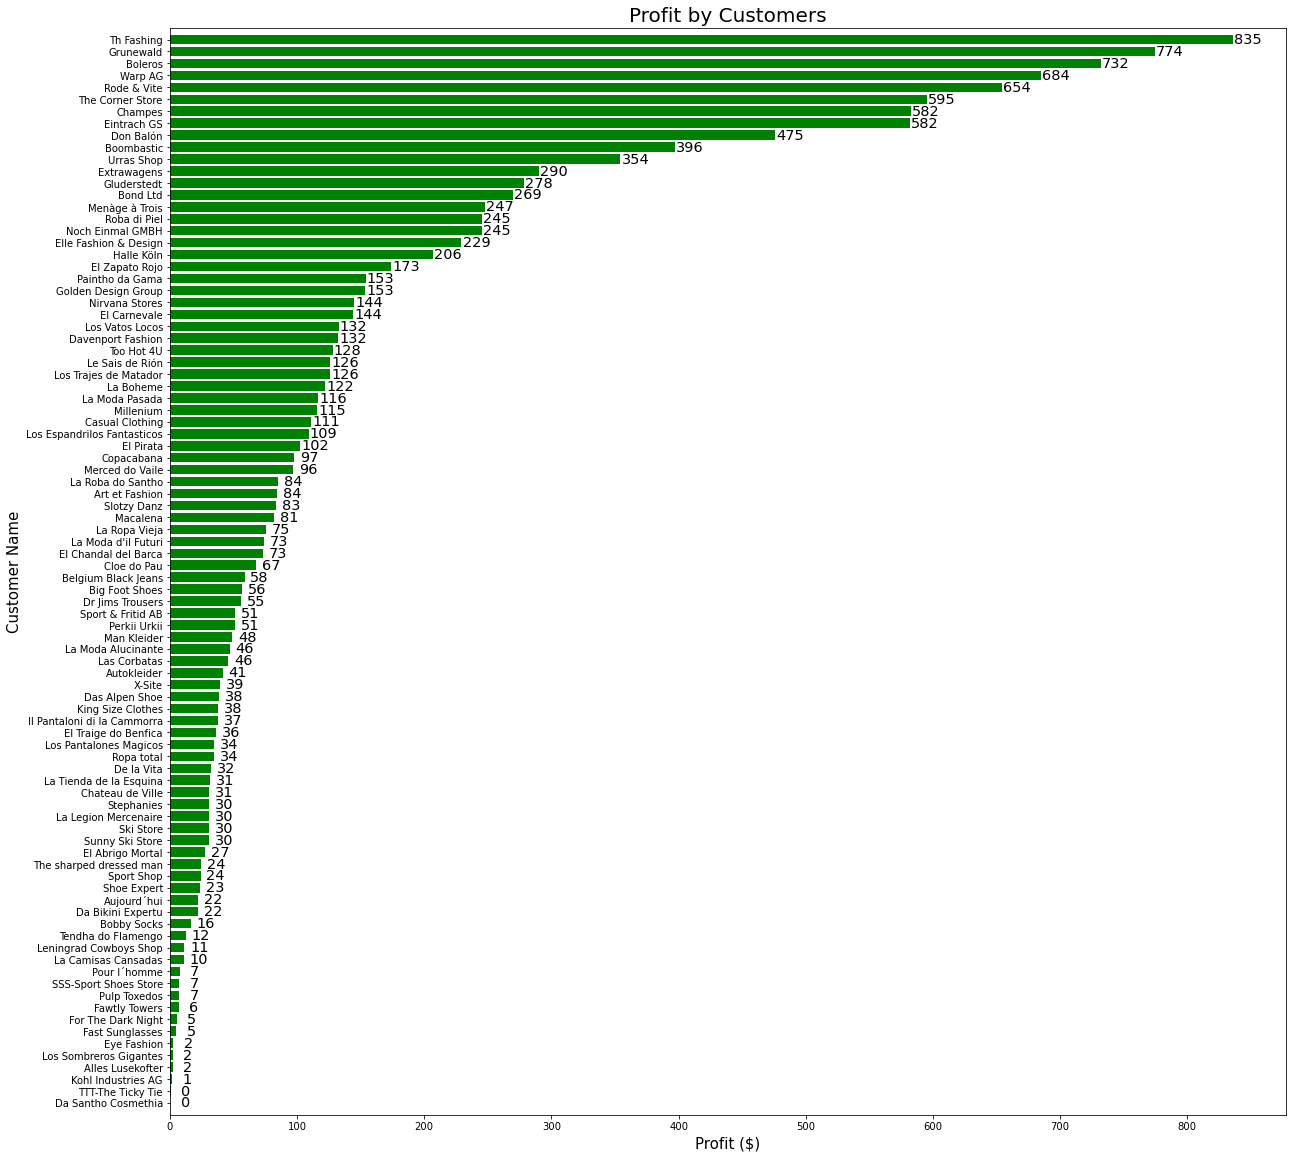

In [7]:

# Define x-axis and y-axis data values
customer = np.array(df['Customer Name'].unique().tolist()) # y-axis labels using customer names
unitPrice = df.groupby('Customer Name')['UnitPrice in USD'].sum()
unitCost = df.groupby('Customer Name')['UnitCost in USD'].sum()
profit = unitPrice - unitCost # profit by customer

# reverse sort for plotting purpose
profit.sort_values(ascending = True, inplace = True)

# customer name to their profit
customer = profit.index

# set size of the plot to 20 by 20
plt.figure(figsize=(20,20))

# set style of plot 
plt.style.use('tableau-colorblind10')

# create horizontal bar chart using data
plt.barh(customer, profit, color = 'green', align= 'center')

# Set title, y-axis label and show legend
plt.title('Profit by Customers', fontsize = 20)
plt.xlabel('Profit ($)', fontsize = 15)
plt.ylabel('Customer Name', fontsize = 15)

# set ranges for both axis
plt.ylim(bottom = -1, top = 90)

# display data labels
for x,y in zip(customer, profit):
   
    label = int(y)
    
    plt.annotate(label, # this is the text
                (y,x), # this is the point to label
                textcoords="offset points", # how to position the text
                xytext = (15,-4), # distance from text to points (x,y)
                ha='center',# horizontal alignment can be left, right or center
                fontsize = 14.5) # change font size 
# display chart
plt.show();


This is the visualization of Profit from each customer throughout the years provided in the dataset.

For this visualization, I used a horizontal bar chart, with customer name (y-axis) against profit (x-axis),
to show the data as it can be interpreted easily by users with little to none data analysis background. 
The longer the bar chart, the higher the profit is made by the customer. Even though the difference in the length of
each bar chart is noticable, I added labels that the side to help users to see and understand easily the extact amount
of profit made by each customer.

Hence from the visualization above, the highest 3 profit is made by these customers:
    
Customer Name | Profit Made ($)
--- | ---
The Fashing | 835
Grunewald | 774
Boleros | 732

Therefore, The Fashing is the customer that generated the most profit.

Thus, answering the question: 'Which customer generated the most profit?'

### Visual 2 <a id="custvisual2"></a>
This answers the question 'Which customer generated the most revenue?'

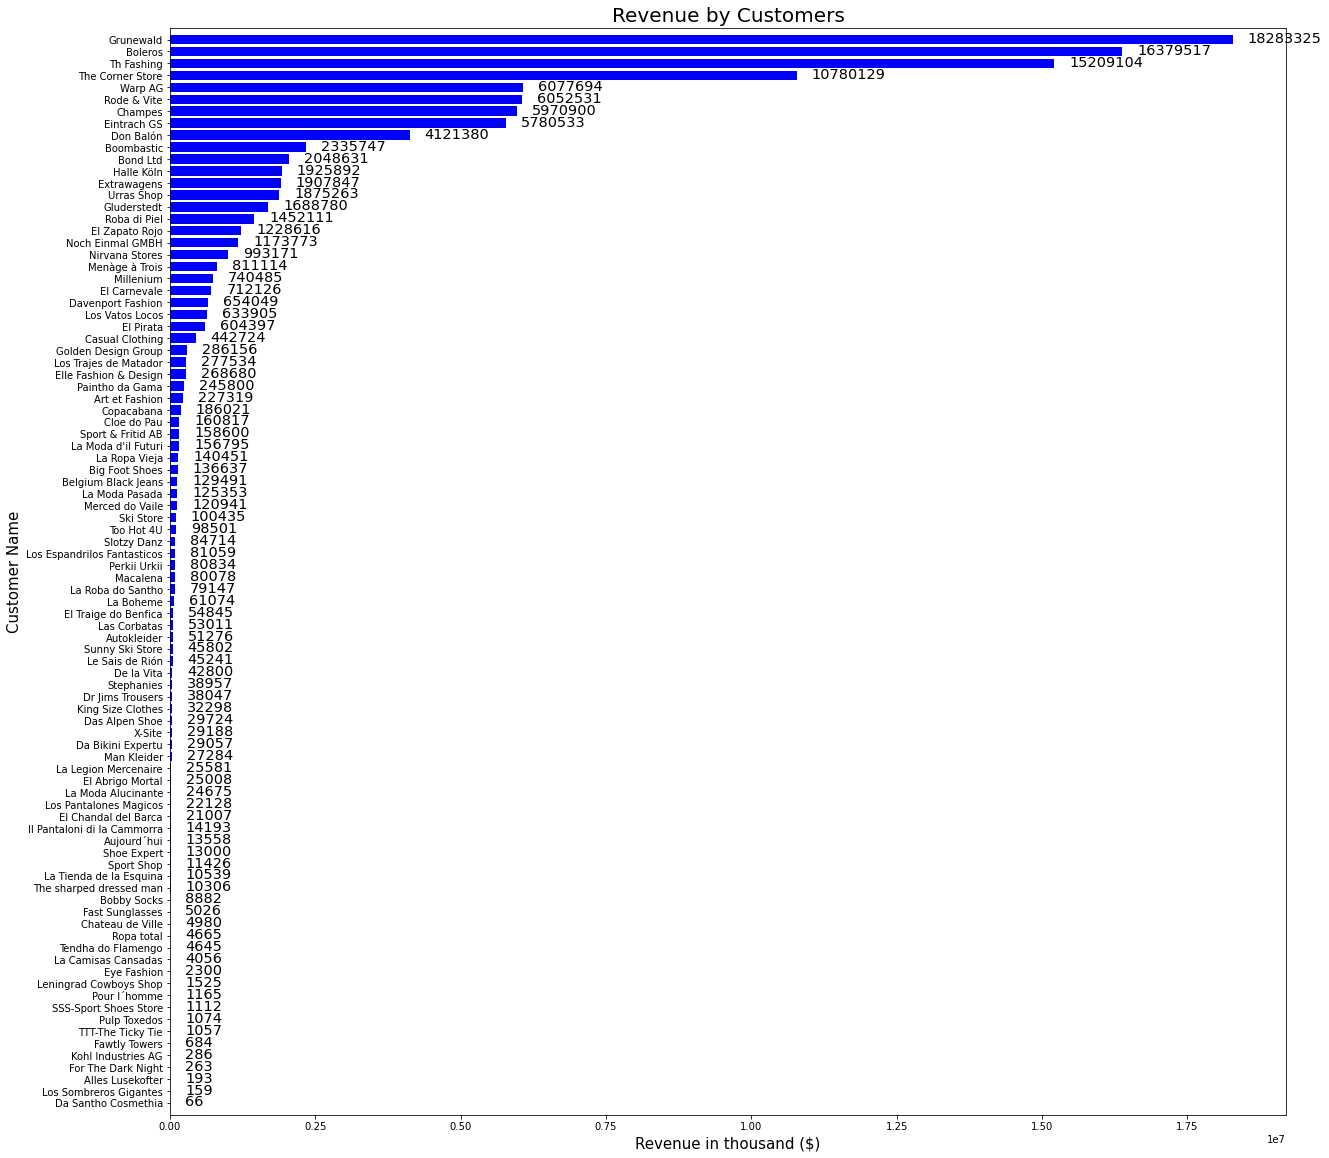

In [8]:

# Define x-axis and y-axis data values
unitPrice = df.groupby('Customer Name')['UnitPrice in USD'].sum()
quantity = df.groupby('Customer Name')['Quantity'].sum()
costumer_revenue = unitPrice * quantity

# reverse sort for plotting purpose
costumer_revenue.sort_values(ascending = True, inplace = True)

# customer name to their revenue
customer = costumer_revenue.index

# set size of the plot to 20 by 20
plt.figure(figsize=(20,20))

# set style of plot 
plt.style.use('tableau-colorblind10')

# create horizontal bar chart using data
plt.barh(customer, costumer_revenue, color = 'blue', align= 'center')

# Set title, y-axis label and show legend
plt.title('Revenue by Customers', fontsize = 20)
plt.xlabel('Revenue in thousand ($)', fontsize = 15)
plt.ylabel('Customer Name', fontsize = 15)

# set ranges for both axis
plt.ylim(bottom = -1, top = 90)

# display data labels
for x,y in zip(customer, costumer_revenue):
    
    label = int(y)
    
    plt.annotate(label, # this is the text
                (y,x), # this is the point to label
                textcoords="offset points", # how to position the text
                xytext = (15,-3), # distance from text to points (x,y)
                ha='left',# horizontal alignment can be left, right or center
                fontsize = 14.5) # change font size 

# display chart
plt.show();

This is the visualization of Revenue from each customer throughout the years provided in the dataset.

For this visualization, I also used a horizontal bar chart, with customer name (y-axis) against revenue (x-axis),
to show the data as users can understand it easily. The longer the bar chart, the higher the revenue made by the customer.
Furthermore, the labels at the side aids users in understand the visual better.

Hence from the visualization above, the highest 3 revenue is made by these customers:

Customer Name | Revenue Made ($)
--- | ---
Grunewald | 18283325
Boleros | 16379517
The Fashing | 15209104

Therefore, Grunewald is the customer that generated the most revenue.

Thus, answering the question: 'Which customer generated the most revenue?'

## Visuals for Product Analysis <a id="ProductVisuals"></a>
[Link to Overview](#Overview)

### Visual 1 <a id="prodvisual1"></a>
These visualisation helps to understand the Revenue from Each Products in 2017 and 2018 respectively.

### 2018 Visual <a id="2018visual"></a>

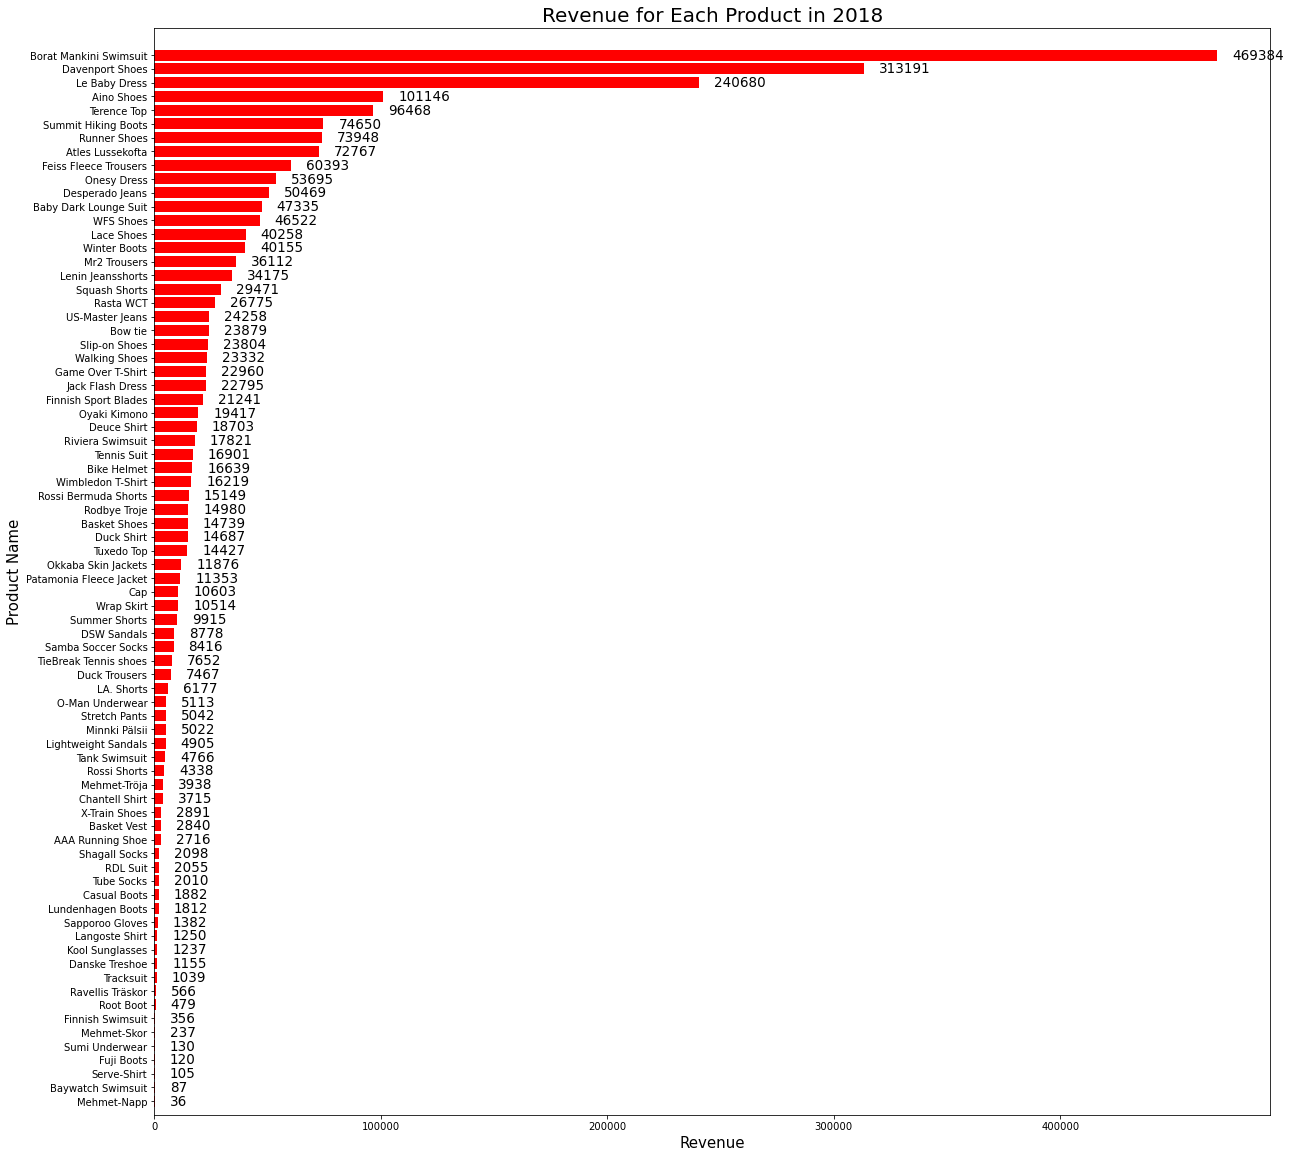

In [9]:

# filter rows where year == 2018 from df and store them in df2018
df2018 = df[df["Order Year"]== 2018]

# get product revenue in 2018
unit_price = df2018.groupby('ProductName')['UnitPrice in USD'].sum()
prod_quantity = df2018.groupby('ProductName')['Quantity'].sum()
product_revenue = prod_quantity * unit_price

# reverse sort for plotting purpose
product_revenue.sort_values(ascending = True, inplace = True)

# store product name sorted based on unit price
productName = product_revenue.index

# set size of the plot to 20 by 20
plt.figure(figsize=(20,20))

# set style of plot 
plt.style.use('tableau-colorblind10')

# create horizontal bar chart using data
plt.barh(productName, product_revenue, color = 'red', align= 'center')

# set titles for plot
plt.title('Revenue for Each Product in 2018', fontsize = 20)
plt.ylabel('Product Name', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)

# set ranges for both axis
plt.ylim(bottom = -1, top = 78)

# display data labels
for x,y in zip(productName, product_revenue):
    
    label = int(y)
    
    plt.annotate(label, # this is the text
                (y,x), # this is the point to label
                textcoords="offset points", # how to position the text
                xytext = (15,-4), # distance from text to points (x,y)
                ha='left',# horizontal alignment can be left, right or center
                fontsize = 13.5) # change font size 
# display chart
plt.show();

### 2017 Visual <a id="2017visual"></a>

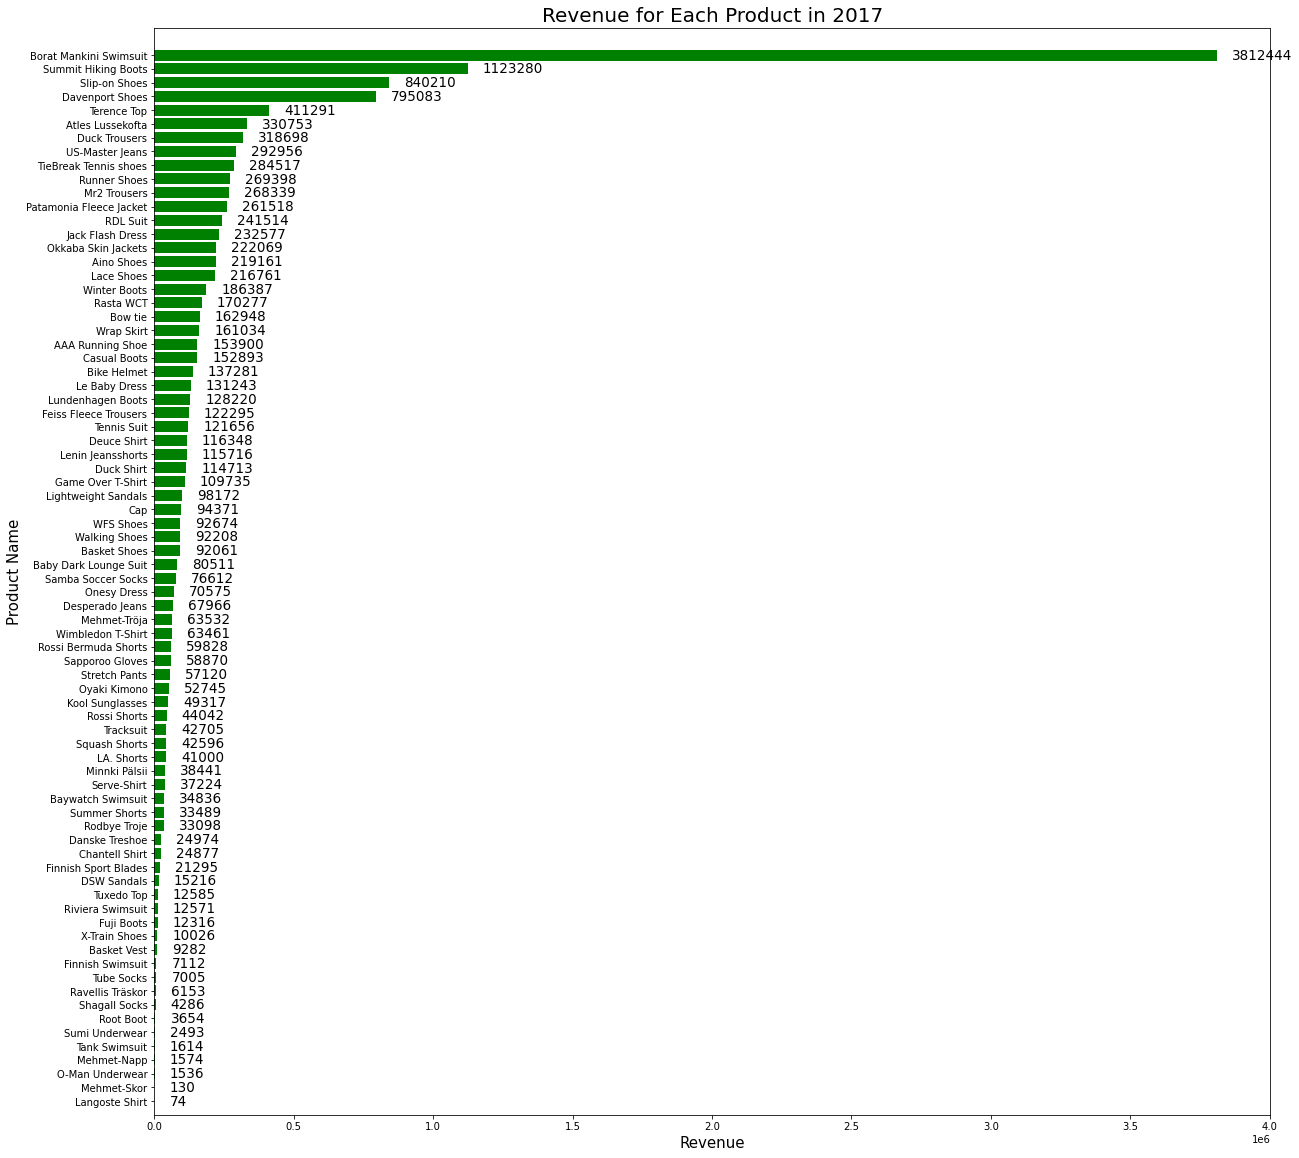

In [10]:

# filter rows where year == 2017 from df and store them in df2017
df2017 = df[df["Order Year"]== 2017]

# get product revenue in 2017
unitPrice = df2017.groupby('ProductName')['UnitPrice in USD'].sum()
prodQuantity = df2017.groupby('ProductName')['Quantity'].sum()
productRevenue = prodQuantity * unitPrice

# reverse sort for plotting purpose
productRevenue.sort_values(ascending = True, inplace = True)

# store product name sorted based on unit price
product_Name = productRevenue.index

# set size of the plot to 20 by 20
plt.figure(figsize=(20,20))

# set style of plot 
plt.style.use('tableau-colorblind10')

# create horizontal bar chart using data
plt.barh(product_Name, productRevenue, color = 'green', align= 'center')

# set titles for plot
plt.title('Revenue for Each Product in 2017', fontsize = 20)
plt.ylabel('Product Name', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)

# set ranges for both axis
plt.ylim(bottom = -1, top = 78)

# display data labels
for x,y in zip(product_Name, productRevenue):
    
    label = int(y)
    
    plt.annotate(label, # this is the text
                (y,x), # this is the point to label
                textcoords="offset points", # how to position the text
                xytext = (15,-4), # distance from text to points (x,y)
                ha='left',# horizontal alignment can be left, right or center
                fontsize = 13.5) # change font size 
# display chart
plt.show();


This is the visualization of Revenue for Each Product in the Year 2018:

[2018 Visual](#2018visual)
    
For this visualization, I used a horizontal bar chart, with product name (y-axis) against revenue (x-axis), to show the 
data for the year 2018 to allow easier understanding by users. 
The longer the bar chart, the higher the revenue is made by the products
respectively in the year 2018. Furthermore, the difference in the length of each bar chart and the labelling at the sides 
helps users to understand which product generated the most revenue.
    
Hence from the visualization, the highest 3 revenue is made in 2018 by these products:
    
Product Name | Revenue Made
--- | ---
Borat Mankini Swimsuit | 469384
Davenport Shoes | 313191
Le Baby Dress | 240680

This is the visualization of Revenue for Each Product in the Year 2017:

[2017 Visual](#2017visual)

Similarly for this visualization, I used a horizontal bar chart, with product name (y-axis) against revenue (x-axis), 
to show the data in the year 2017 to allow better understanding by users. 
As above, the longer the bar chart, the higher the revenue is made by the products respectively in the year 2017. 
Also, the difference in the length of each bar chart and the labelling at the sides helps users to 
understand which product generated the most revenue.

Hence from the visualization, the highest 3 revenue is made in 2017 by these products
    
Product Name | Revenue Made
--- | ---
Borat Mankini Swimsuit | 3812444
Summit Hiking Boots | 1123280
Slip-on Shoes | 840210
    
In addition, I used different colors to represent each graph respectively. 
    
Red for 2018 and Green for 2017.

Therefore, the product that generated the most revenue in both years is the Borat Mankini Swimsuit.
    
Thus, answering the question: 'Which product generated the most revenue?'

### Visual 2 <a id="prodvisual2"></a>
This visual helps users to understand which product category has the most amount of profit in 2018.

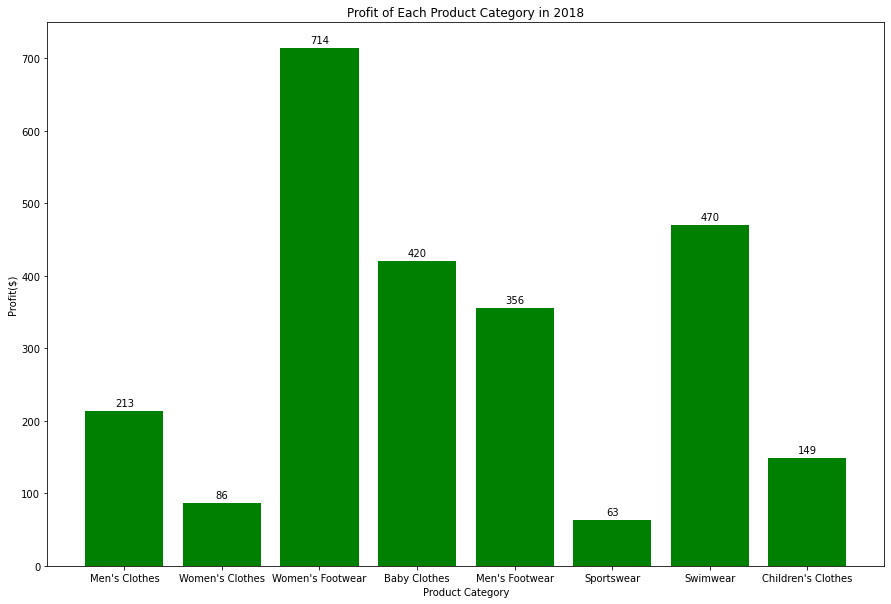

In [11]:

# define both axis data values
cate_Name = df2018['Product CategoryName'].unique()
unit_Price = np.array(df2018.groupby('Product CategoryName')['UnitPrice in USD'].sum())
unit_Cost = np.array(df2018.groupby('Product CategoryName')['UnitCost in USD'].sum())
profitCat = np.array(unit_Price - unit_Cost).astype(int)

# set size of the plot to 15 by 10
plt.figure(figsize=(15,10))

# Create a vertical bar chart using data
plt.bar(cate_Name , profitCat , align='center', color = 'g') # align define the alignment of x-ticks

# State title of plot and the axes labels
plt.title('Profit of Each Product Category in 2018')
plt.ylabel('Profit($)')
plt.xlabel('Product Category')

# display annotations
for x, y in zip( cate_Name, profitCat):
    label = y # value of data label to display
    
    plt.annotate(label, 
                (x,y),
                textcoords = "offset points",
                xytext = (0,5), 
                ha = 'center')

# display plot
plt.show();


This is the visualization for Profit Made by Each Product Category in 2018.

For this visualization, I used a vertical bar chart, with Profits (y-axis) against Product Category (x-axis),
to show the data. The higher the bar chart, the more profit is made by the category respectively. With this visual, it 
helps users to see and understand which product category made the most profit.

Hence from the visualization above, the highest 3 profit is made by these product category:

Product Category | Profits ($)
---|---
Women's Footwear | 714
Swimwear | 470
Baby Clothes | 420

As such, the product category with the highest profit made is Women's Footwear.

Thus, answering the question: 'Which product category has the most amount of profit? '

### Visual 3 <a id="prodvisual3"></a>
This pie chart shows the Sum of Order Quantity for Each Product Category in the Year 2018.

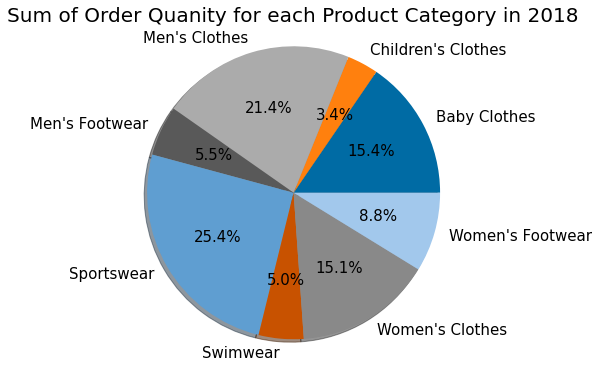

In [12]:

# define data values and labels for pie chart
num = df2018.groupby('Product CategoryName')['Quantity'].sum()
prodCatName = num.index

# create figure and subplot
fig, ax2 = plt.subplots(figsize = (10,6))

# plot pie chart
ax2.pie(num, labels = prodCatName, autopct = '%1.1f%%',textprops = {'fontsize' : 15}, shadow = True)

# set equal ratio aspect ratio to ensure that pie is drawn a circle
ax2.axis('equal')

# set title
ax2.set_title('Sum of Order Quanity for each Product Category in 2018', fontsize = 20)

# display plot
plt.show();


This is the visualization for the Sum of Order Quantity for each Product Category in 2018.

For this visualization, I used a pie chart to show the sum percentage of order quantity that each product category made respectively.
This simple visual, along with labels of the percentage of order quantity that each category made, helps users to
understand easily which product category has the msot sum of Order Quantity.

Hence from the visualization above, the highest 3 percentage is made by these Product Category:
    
Product Category | Percentage (%)
--- | ---
Sportswear | 25.4
Men's Clothes | 21.4
Baby Clothes | 15.4

Therefore, the product category that made the highest percentage is Sportswear.

Thus, answering the question: 'Which product category sold the highest quantity? '

## Visuals for Price Analysis <a id="PriceVisuals"></a>
[Link to Overview](#Overview)

### Visual 1 <a id="pricevisual1"></a>
How is the revenue and profit for each month in the year 2017?

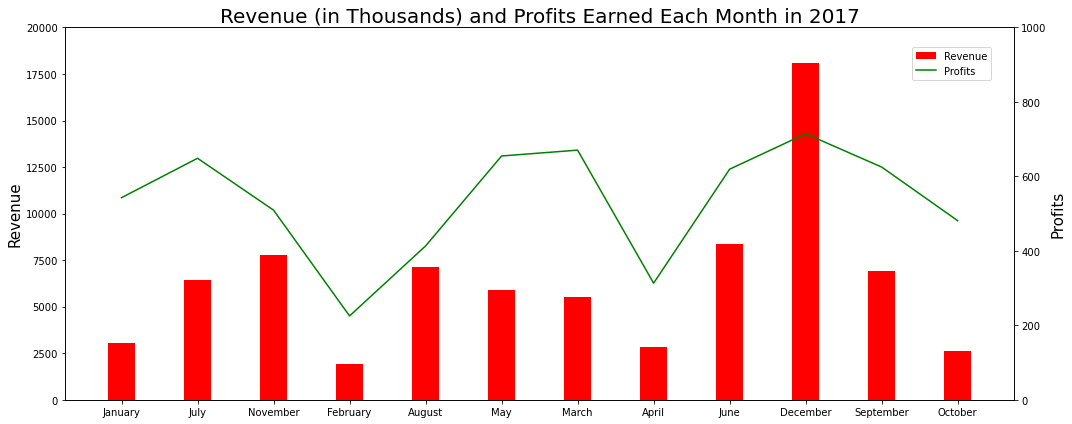

In [13]:

# Define x-axis and y-axis data values
order_month = df2017['Order Month'].unique()
unitPrice17 = np.array(df2017.groupby('Order Month')['UnitPrice in USD'].sum()) # revenue for each month
unitCost17 = np.array(df2017.groupby('Order Month')['UnitCost in USD'].sum())
num17 = np.array(df2017.groupby('Order Month')['Quantity'].sum())
revenue17 = np.array(num17 * unitPrice17)
profit17 = np.array(unitPrice17 - unitCost17) # profit for each month

# Create a figure and subplot for revenue chart
fig, ax_r = plt.subplots(1,1,figsize=(15,6))

# Plot revenue chart
ax_r.bar(order_month, revenue17/1000, width=0.35, label='Revenue', color = 'red')
ax_r.set_ylim(bottom = 0, top = 20000)
ax_r.set_title('Revenue (in Thousands) and Profits Earned Each Month in 2017', fontsize = 20)
ax_r.set_ylabel('Revenue', fontsize = 15) # first y-axis (on the left)

# Instantiate a second axes that shares the same x-axis
ax_p = ax_r.twinx()

# Plot profits chart
ax_p.plot(order_month, profit17, 'g', label = 'Profits')
ax_p.set_ylim(bottom = 0, top = 1000)
ax_p.set_ylabel('Profits', fontsize = 15) # second y-axis (on the right)

# Set location of legend for both axes
fig.legend(loc=(0.85,0.81))

# display annotations
for x, y in zip(order_month, revenue17):
    label = y # value of data label to display
    
    ax_r.annotate(label, 
                (x,y),
                textcoords = "offset points",
                xytext = (0,5), 
                ha = 'center')

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show();


This is the visualization for Revenue and Profits Earned in Each Month of the year 2017.

For this visualization, I used a duel-axis chart to plot the data provided in the year 2017, 
with the bar chart representing the Revenue and the line graph representing the Profit made each month respectively.
For the bar chart, the longer the bar chart, the higher the amount of Revenue is made. And for the line graph, the 
higher the point is, the higher the amount of Profit is made. This visual helps users to compare the 
Revenue and Profit made between each month, thus getting a better understanding of 
how the revenue and profit is for each month in the year 2017.

From the visual above, the month with the highest Revenue is December, followed by Novemner and June.
While the month with the highest Profit is December, followed by March and July. 

Thus, answering the question: '1. How is the revenue and profit for each month in the year 2017?'

### Visual 2 <a id="pricevisual2"></a>
This helps answers the question 'does the product unit cost/price increase due time date?'

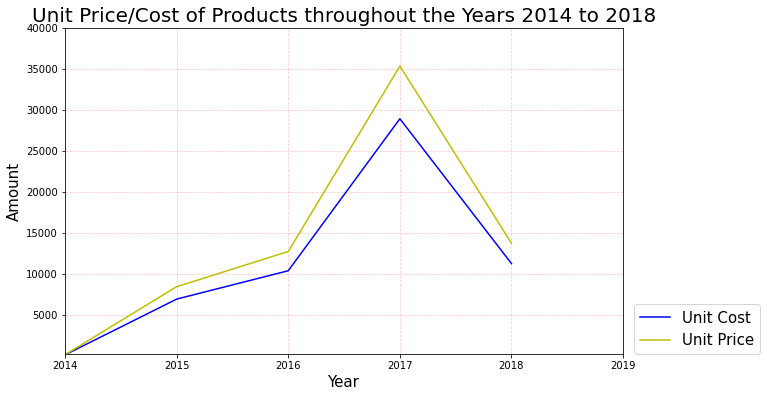

In [14]:

# get data for x-axis and y-axis
year = np.array(df['Order Year'].unique().tolist())
year.sort()
unit_Cost = np.array(df.groupby('Order Year')['UnitCost in USD'].sum()).astype(int)
unit_Price = np.array(df.groupby('Order Year')['UnitPrice in USD'].sum()).astype(int)

# set size of the plot to 10 by 6
plt.figure(figsize=(10,6))

# set style of plot 
plt.style.use('tableau-colorblind10')

# set title for plot
plt.title('Unit Price/Cost of Products throughout the Years 2014 to 2018', fontsize = 20)

# set labels for x-axis and y-axis 
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)

# set front size of ticks on the x and y axis
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# set ranges for both axis
plt.xlim(left = 2014, right = 2019)
plt.ylim(bottom = 250, top = 40000)

# turn grid on or off (0 = 0ff, 1 = on)
plt.grid(c = 'r', alpha = .2, linestyle = '--')

# create plot
plt.plot(year, unit_Cost, c = 'b', label = 'Unit Cost')
plt.plot(year, unit_Price, c = 'y', label = 'Unit Price')

# set position of legend
plt.legend(fontsize = 15, loc=(1.02,0))

# display plot
plt.show();


This is the visualization for the Unit Price/Cost of Products throughout the Years 2014 to 2018.

For this visualization, i used a line chart, with Amount (y-axis) against Year (x-axis),
to show how the Unit Price/Cost changes throughout the years. To differentiate between the two factors, 
I used 'Blue' to represent Unit Cost and 'Yellow' to represent Unit Price. With this, users are able to gain
insights on how the prices/cost have changed respectively through the years and make comparisions.

Both the Unit Price and Unit Cost have similar changes.

From the visualization above,

Year | Type of Change (Increase/Decrease)
--- | ---
2014-2015 | Increase
2015-2016 | Increase
2016-2017 | Increase
2017-2018 | Decrease

Furthermore, by looking at the steepness of the line, users are able to understand how "big" the change is.
The steeper the line, the bigger the chance.

Hence, users can conclude that from 2016-2017, there is a big increase of Unit Price and Unit Cost.

Thus, answering the question: "Does the product unit cost/price increase due time date?"

## Visuals for Place Analysis <a id="PlaceVisuals"></a>
[Link to Overview](#Overview)

### Visual 1 <a id="placevisual1"></a>
This visual helps users to understand which coutries generated the most/less revenue/profit in the year 2018.

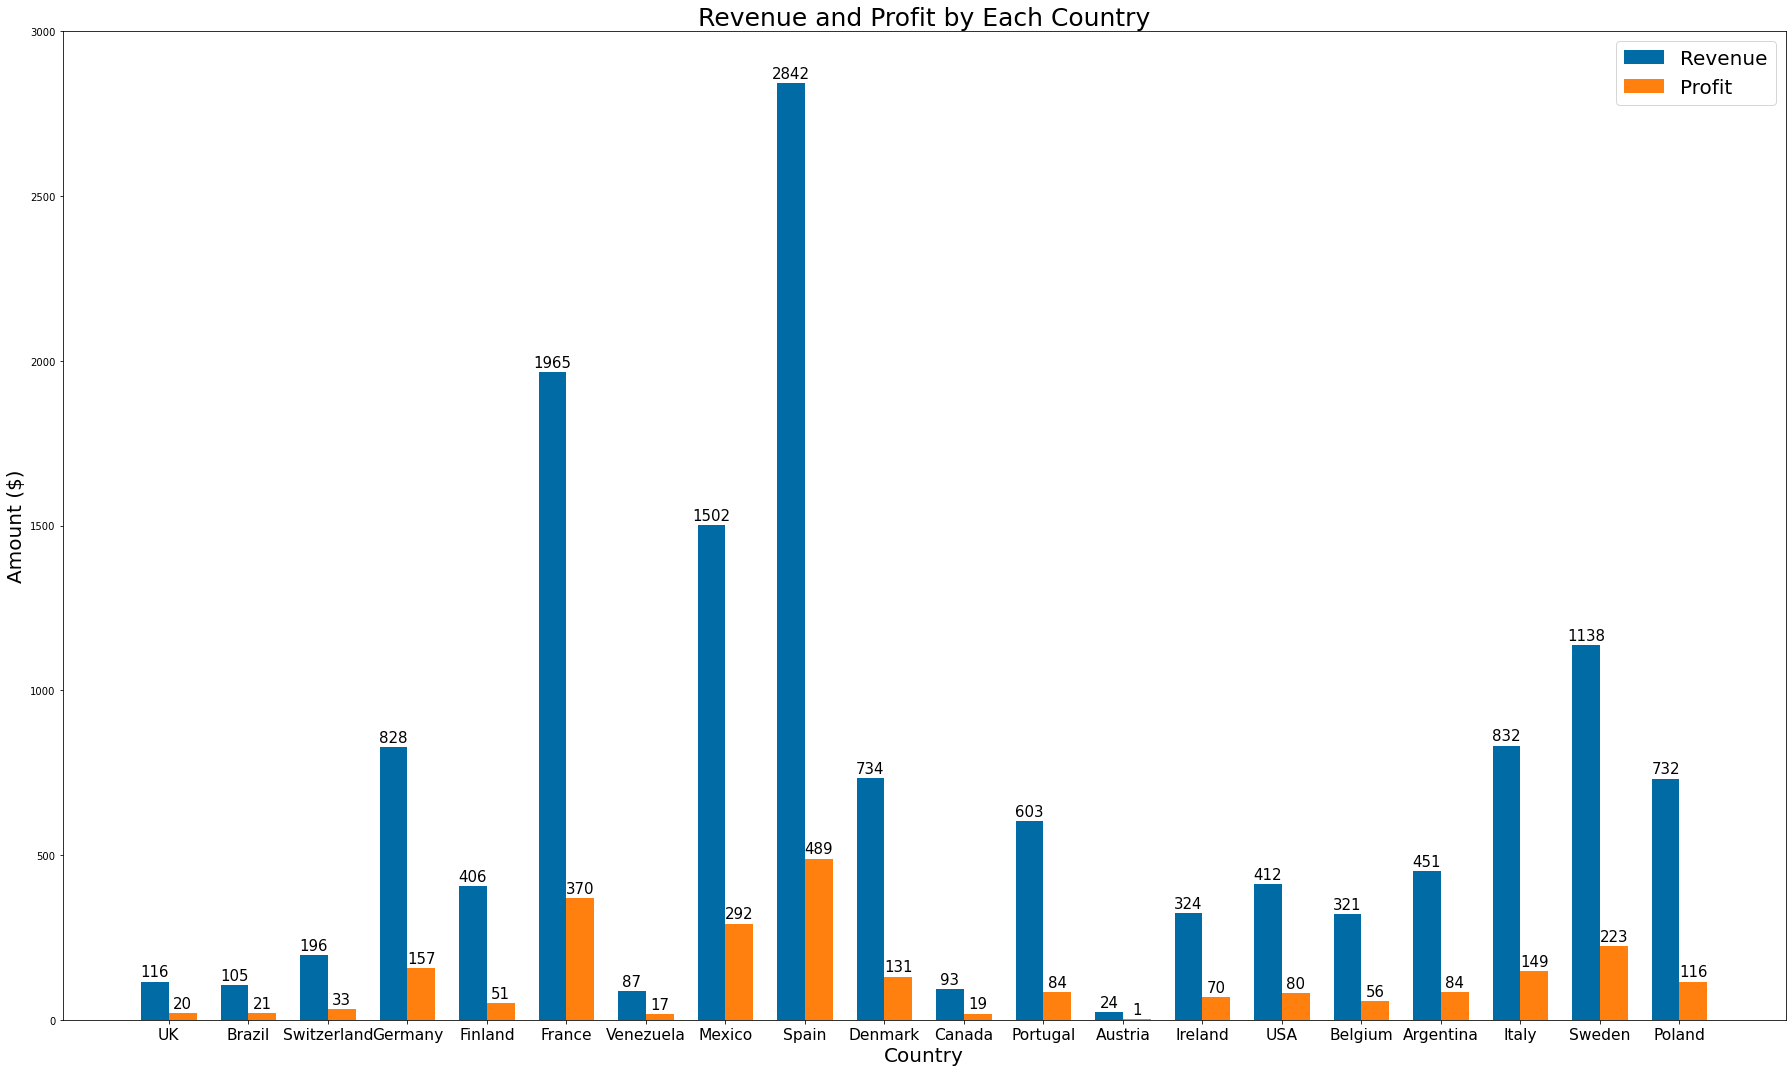

In [15]:

# Define x-axis and y-axis data values
country = df2018['Customer Country'].unique().tolist()

# get revenue in 2018 - got abit prob here in dashboard part
revenue = df2018.groupby('Customer Country')['UnitPrice in USD'].sum().astype(int) # either one
#revenue = df2018.groupby('Customer Country')['UnitPrice in USD'].sum()

# get profit in 2018
unitPrice = df2018.groupby('Customer Country')['UnitPrice in USD'].sum()
unitCost = df2018.groupby('Customer Country')['UnitCost in USD'].sum()
profit = np.array(unitPrice - unitCost).astype(int)

# Set the label locations and width of the bars
x = np.arange(len(country))  
width = 0.35

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(25, 15))

# Plot side-by-side bars
bar1 = ax.bar(x - width/2, revenue, width, label='Revenue', )
bar2 = ax.bar(x + width/2, profit, width, label='Profit')

# Customise the plot
ax.set_title('Revenue and Profit by Each Country', fontsize = 25)
ax.set_xlabel('Country', fontsize = 20)
ax.set_ylabel('Amount ($)', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(country, fontsize = 15.5)
ax.set_ylim(bottom = 0, top = 3000)
ax.legend(fontsize = 20)

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15)

# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show();


This is the visualization for Revenue and Profit made by Each Country in the year 2018.

For this visualization, I used a stacked vertical bar chart, with Amount (y-axis) agaisnt Country (x-axis), 
to show the Revenue and Profit made by respective Countries in the year 2018. The higher the bar chart, the more Revenue
/Profit is made by the Country. I also included data labels, which are rounded to the nearest integer,
to help users see clearly how much the bar represent. 
In addition, I used two different colors to differentiate betweent the two factors.

The "Blue" chart is for Revenue, while the "Orange" chart is for Profit. 

Hence, from the visualization above, the highest 3 Revenue made comes from:
    
Country | Revenue
---|---
Spain | 2842
France | 1965
Mexico | 1502

While the lowest 3 Revenue made comes from:
    
Country | Revenue
---|---
Austria | 24
Venezuela | 87
Canada | 93

Furthermore, the highest 3 Profit made comes from:
    
Country | Profit
---|---
Spain | 489
France | 370
Mexico | 292

While the lowest 3 Profit made comes from:
    
Country | Profit
---|---
Austria | 1
Venezuela | 17
Canada | 19  

As such, the Country where the most Revenue and Profit is made is Spain, while the lowest is Austria.

Thus, answering the question: 'Which countries/cities generated the most/less revenue/profit? ' 

### Visual 2 <a id="placevisual2"></a>
This pie chart shows how are customers distributed across locations in the year 2018.

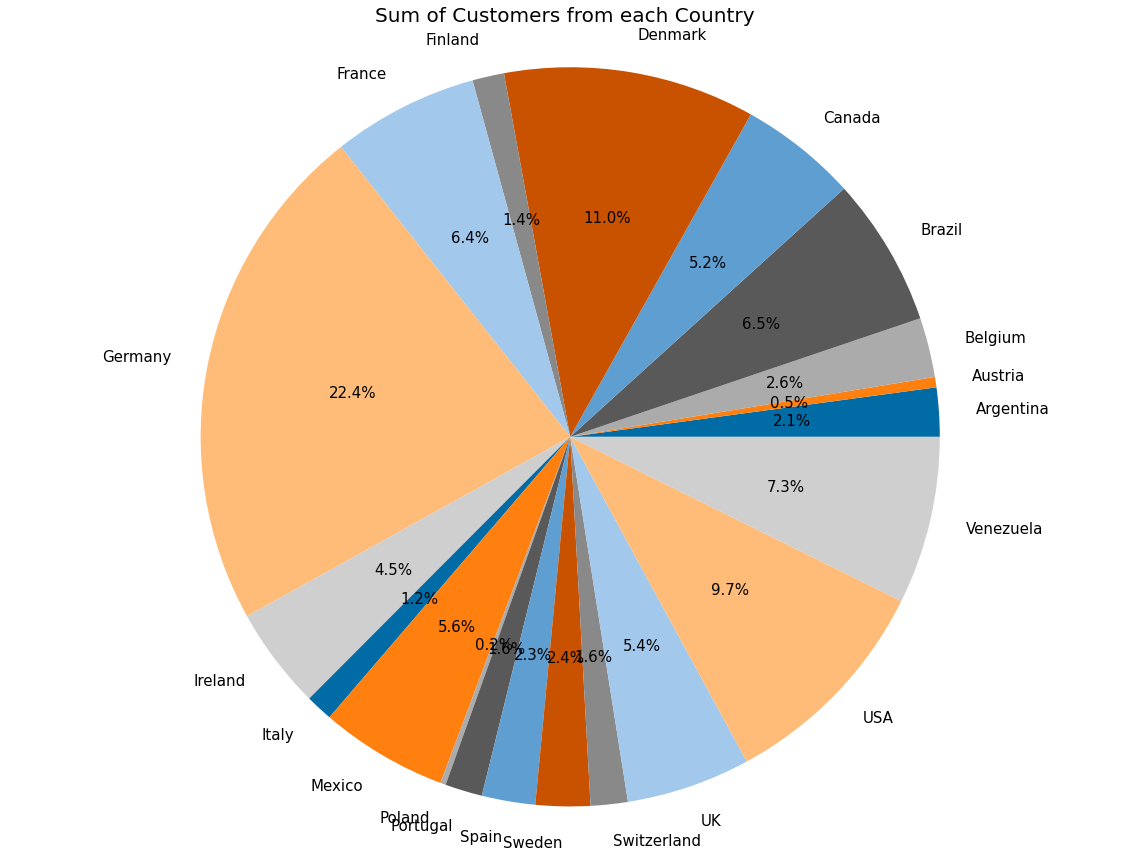

In [16]:

# define data values and labels for pie chart
numOfCustomer = df2018.groupby('Customer Country')['OrderID'].sum()
country = numOfCustomer.index

# create figure and subplot
fig, ax5 = plt.subplots(figsize = (20,15))

# plot pie chart
ax5.pie(numOfCustomer, labels = country,autopct = '%1.1f%%', textprops = {'fontsize' : 15}, shadow = False)

# set equal ratio aspect ratio to ensure that pie is drawn a circle
ax5.axis('equal')

# set title
ax5.set_title('Sum of Customers from each Country', fontsize = 20)

# display plot
plt.show();


This is the visualization for Sum of Customers from each Country in the year 2018.

For this visualization, I used a pie chart to show the sum percentage of number of Customers in each Country respectively.
This visual, along with labels of the percentage of number of Customer in each Country and their Country's Name, helps
users to understand where the majority of the Customers come from in the year 2018. 

Hence from the visual above, the highest 3 percentage of Customers comes from:
    
Country | Percentage (%)
---|---
Germany|22.4
Denmark|11.0
USE|5.4

Overall, the customers are unevenly spread out across locations,
with 22.4% of Customers coming from Germany, and 0.2% from Poland.


Thus, this answers the question: 'How are customers distributed across locations? '


# 4. Dashboards <a id="Dashboards"></a>
[Link to Overview](#Overview)

## DashBoard for Product Analysis <a id="prodDashboard"></a>

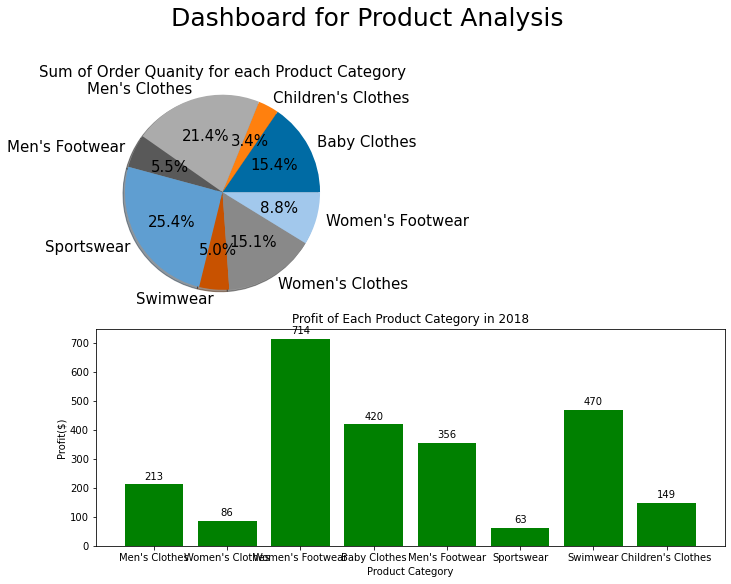

In [17]:

# create a figure to be used as dashboard
fig2 = plt.figure(figsize=(10,8), constrained_layout = True)

# use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows = 2, ncols = 2, figure = fig2)
ax1 = fig2.add_subplot(gs[1, :])
ax2 = fig2.add_subplot(gs[0, 0])

# define first subplot for  vertical barchart--------------------------------------------------------------
# Create a vertical bar chart using data
ax1.bar(cate_Name , profitCat, align='center', color = 'g') # align define the alignment of x-ticks
# State title of plot and the axes labels
ax1.set_title('Profit of Each Product Category in 2018')
ax1.set_ylabel('Profit($)')
ax1.set_xlabel('Product Category')
# set ranges for both axis
#ax1.ylim(bottom = -1, top = 78)
#plt.xlim(left = 0, right = 600)

# display annotations
for x, y in zip(cate_Name, profitCat):
    label = y # value of data label to display
    
    ax1.annotate(label, 
                (x,y),
                textcoords = "offset points",
                xytext = (0,5), 
                ha = 'center', fontsize = 10)
       
# define second subplot for piechart--------------------------------------------------------------
# plot pie chart
ax2.pie(num, labels = prodCatName, autopct = '%1.1f%%',textprops = {'fontsize' : 15}, shadow = True)
# set equal ratio aspect ratio to ensure that pie is drawn a circle
ax2.axis('equal')
# set title
ax2.set_title('Sum of Order Quanity for each Product Category', fontsize = 15)

# title of dashboard
fig2.suptitle("Dashboard for Product Analysis\n", fontsize = 25)

# display plot
plt.show()


This is the DashBoard for Product Analysis, focuses on mainly the topic on which Product Category to improve
on.

This dashboard includes visualization from [Sum of Order Quantity for each Product Category in 2018](#prodvisual3)
and
[Profit Made by Each Product Category in 2018](#prodvisual2). 

Firstly, the pie chart on the top left corner tells the user the Sum of Order Quantity for 
each Product Category in 2018. With the percentage and category name labels, users are able to understand 
which Product Category has the highest or lowest order quantity. In this case, Men's 
Clothes has the highest order
quantity, with 21.4% while the Children's 
Clothes has the lowest, with 3.4%. 

Secondly, the bar chart on the bottoms tells the user the Profit Made by Each Product Category in 2018.
The higher the bar, the higher profit is made for the following Product Category.
With name columns and data labels on the graph, users are able to see which product category is thriving and which is not.
In this case, Women's 
Footwear has $714 profit, which is the highest, while Sportswear has the lowest profit, which is
$63 in the year 2018. 

Both of these visualizations help users to understand which Product Category is doing well in sales and which needs more
attention to, which are categories such as Sportswear and Children's Clothes. 

In addition, users can use similar sales stragies that is used for categories such as Men's Clothes or  Women's Footwear
to improve the sales for categories as such Sportswear and Children's Clothes.


## DashBoard for Price Analysis <a id="priceDashboard"></a>

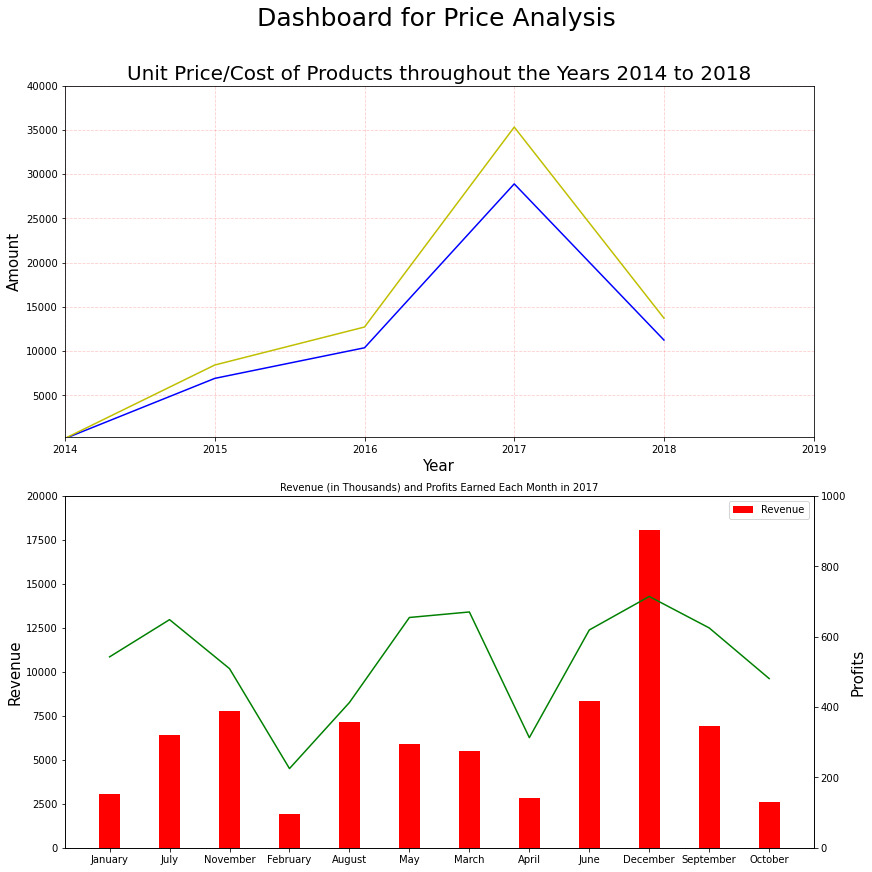

In [18]:

# create a figure to be used as dashboard
fig3 = plt.figure(figsize=(12,12), constrained_layout = True)

# use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows = 2, ncols = 2, figure = fig3)
ax1 = fig3.add_subplot(gs[1, :])
ax2 = fig3.add_subplot(gs[0, :])

# define first subplot for double axischart--------------------------------
# Plot revenue chart
ax1.bar(order_month, revenue17/1000, width=0.35, label='Revenue', color = 'red')
ax1.set_ylim(bottom = 0, top = 20000)
ax1.set_title('Revenue (in Thousands) and Profits Earned Each Month in 2017', fontsize = 10)
ax1.set_ylabel('Revenue', fontsize = 15) # first y-axis (on the left)
# Instantiate a second axes that shares the same x-axis
ax_p = ax1.twinx()
# Plot profits chart
ax_p.plot(order_month, profit17, 'g', label = 'Profits')
ax_p.set_ylim(bottom = 0, top = 1000)
ax_p.set_ylabel('Profits', fontsize = 15) # second y-axis (on the right)
# Set location of legend for both axes
ax1.legend()

# display annotations
for x, y in zip(order_month, revenue17):
    label = y # value of data label to display
    
    ax_r.annotate(label, 
                (x,y),
                textcoords = "offset points",
                xytext = (0,5), 
                ha = 'center')
    
# define second subplot for line graph--------------------------------
# set title for plot
ax2.set_title('Unit Price/Cost of Products throughout the Years 2014 to 2018', fontsize = 20)
# set labels for x-axis and y-axis 
ax2.set_xlabel('Year', fontsize = 15)
ax2.set_ylabel('Amount', fontsize = 15)

# set ranges for both axis
ax2.set_xlim(left = 2014, right = 2019)
ax2.set_ylim(bottom = 250, top = 40000)

# turn grid on or off (0 = 0ff, 1 = on)
ax2.grid(c = 'r', alpha = .2, linestyle = '--')

# create plot
ax2.plot(year, unit_Cost, c = 'b', label = 'Unit Cost')
ax2.plot(year, unit_Price, c = 'y', label = 'Unit Price')

# title of dashboard
fig3.suptitle("Dashboard for Price Analysis\n", fontsize = 25)

# display plot
plt.show()


This is the DashBoard for Price Analysis, which focuses on the Trend of Unit Price and Unit Cost, 
as well as the Revenue and Profit from 2017.

This dashboard includes visualization from the [Unit Price/Cost of Products throughout the Years 2014 to 2018](#pricevisual2) and
[Revenue and Profits Earned in Each Month of the year 2017](#pricevisual1).

Firstly, the line graph on the top tells the user the Trend of Unit Price/Cost of Products throughout the Years.
With different colors representing each factor (Unit Price and Unit Cost), users can make comparisons about the price or cost
from past years. 
Recently, from year 2017-2018, there is a decrease in the Unit Cost, hence users can expect to have more affordable production 
in the year 2019. 

Secondly, the duel-axis graph below tells the user the Revenue and Profits Earned in Each Month of the year 2017.
With the bar chart represeting Revenue and line graph representing Profit, users can see that year-end profits, which
is in the month December, has the most amount of profits compared to the begining of the year.

Therefore, with users expecting more affordable production, they can also expect a higher profit made throughout the year 2019.
